In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('CO2 dataset.xlsx')

In [3]:
# Convert year into datetime format
# Set year as index
df.index = pd.to_datetime(df['Year'], format='%Y')
df.drop('Year',axis=1, inplace=True)
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


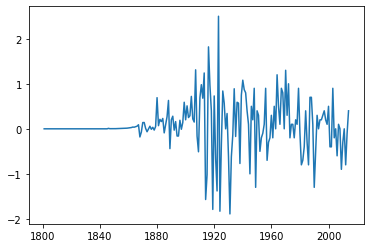

In [4]:
# making the data stationary
df['First Difference'] = df['CO2'] - df['CO2'].shift(1)
plt.plot(df['First Difference'])

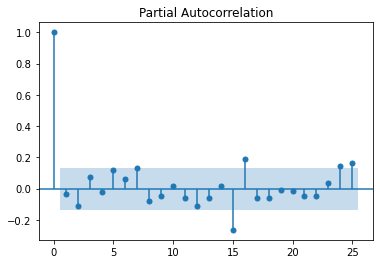

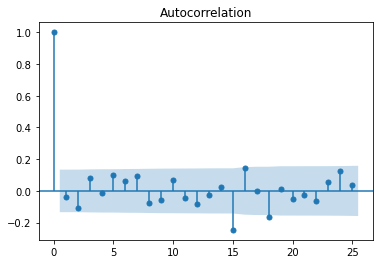

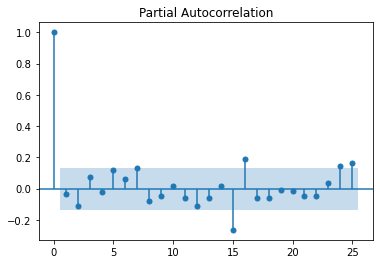

In [7]:
plot_acf(df['First Difference'].dropna(),lags=25)
plot_pacf(df['First Difference'].dropna(),lags=25)

RMSE: 0.49510491370897197
MAE 0.4410041279908461


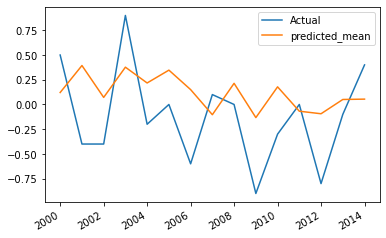

In [10]:
from statsmodels.tsa.arima.model import ARIMA

arima2 = ARIMA(df.loc[:,'First Difference'], order=(15, 1, 2))
results2 = arima2.fit()
predictions2 = results2.predict('2000-01-01', '2014-01-01')

plt.plot(df.loc['2000-01-01':,'First Difference'],label='Actual')
predictions2.plot()
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'First Difference'],predictions2)))
print('MAE',mean_absolute_error(df.loc['2000-01-01':,'First Difference'],predictions2))

In [ ]:
import pickle
with open('arimafoo.pkl', 'wb') as pkl:
    pickle.dump(results2, pkl)
    
with open('arimafoo.pkl', 'rb') as pkl:
    pickle_preds = pickle.load(pkl)
    
start = '2000-01-01'
end = '2050-01-01'
pickle_preds.predict(start, end).plot()